#Anomaly Detection & Time series

#Question1: What is Anomaly Detection? Example its(Point, contextual and collective anomalies) with examples?
--Answer: Anomaly detection is a data mining process used to identify rare items, events, or observations that deviate significantly from the majority of data, often indicating fraud, errors, or system breaches. It filters out noise to spot critical, unexpected incidents.
1.Point Anomalies
A single data point that lies far outside the rest of the distribution.

Example: A credit card transaction for $5,000 when your average, typical purchase is $20.

Example: A sudden spike in CPU usage to 100% on a server that usually operates at 20%

#Question 2:Compare Isolation Forest, DBSCAN and Local Outlier Factor in terms of their approach and suitable use Cases?
--Answer:Isolation Forest, DBSCAN, and Local Outlier Factor (LOF) are popular, unsupervised machine learning algorithms used for anomaly detection, but they operate on fundamentally different principles.

Isolation Forest is best for fast, scalable detection of anomalies that are globally distinct. DBSCAN excels at identifying arbitrarily shaped clusters and flagging outliers as noise. LOF is highly effective at identifying local anomalies, especially when clusters have varying densities.

A. Isolation Forest (Tree-Based Approach)
Approach: Instead of profiling "normal" data, Isolation Forest explicitly isolates anomalies. It builds an ensemble of "Isolation Trees" (iTrees) by randomly selecting a feature and a random split value. Because anomalies are rare and different, they require fewer random partitions to be isolated (shorter path lengths) compared to normal points.

B. DBSCAN (Density-Based Clustering)
Approach: Density-Based Spatial Clustering of Applications with Noise (DBSCAN) groups data points that are closely packed (high-density regions) and marks points in low-density regions as noise. It relies on two parameters: eps (neighborhood radius) and minPts (minimum points to form a dense cluster).

C. Local Outlier Factor (Density-Based Local Approach)
Approach: LOF calculates the local density deviation of a data point relative to its neighbors. It compares the density of a point to the density of its
-nearest neighbors. A point is considered an outlier if its local density is significantly lower than that of its neighbors.

3. Suitable Use Cases
.Isolation Forest
Large-scale Fraud Detection: Rapidly analyzing millions of transaction records.
Network Intrusion Detection: Identifying unusual traffic patterns that differ from normal behavior.
Manufacturing Quality Control: Detecting anomalies in sensor readings in real-time.

.DBSCAN
Geospatial Analysis: Finding hotspots or urban planning congestion areas from GPS data.
Object Detection Post-processing: Clustering centroids of bounding boxes in image processing to eliminate sensor noise.
Anomaly Detection with Non-linear Data: Cases where normal behavior isn't uniformly distributed.
.Local Outlier Factor (LOF)
Subtle Anomaly Detection: Detecting anomalies that exist within a specific cluster but are not globally unique.
.Data with Varying Densities: Datasets where some clusters are very dense and others are sparse.
.Financial Fraud (Detailed Analysis): When fraudulent behavior is hidden within a specific local context.

#Question3:What are the key components of a Time Series? Example each with one Example?
--Answer:Key components of a time series include Trend (long-term direction), Seasonality (fixed, repeating patterns), Cyclicality (long-term, non-fixed oscillations), and Irregularity (random, unpredictable fluctuations). These four elements (T, S, C, I) help decompose data to identify patterns, make forecasts, and analyze anomalies.

Trend (T): The long-term, underlying direction of data (upward, downward, or stable).
Example: A tech company's annual revenue steadily increasing over 10 years.
Seasonal Variation (S): Regular, repeating fluctuations within a fixed, short period (e.g., daily, weekly, monthly, or yearly).
Example: Increased sales of winter coats every December.
Cyclical Variation (C): Long-term oscillations about the trend that do not have a fixed period, often linked to economic cycles lasting several years.
Example: Real estate market booms and recessions occurring over 5–10 year periods.
Irregular Variation (I): Unpredictable, random, or residual variations caused by rare, unforeseen events.
Example: A sudden drop in stock prices due to a natural disaster or pandemic.

#Question4:Define Stationary in time series. HOw can you test and transform a non-stationary series into a stationary one?
--Answer:A stationary time series has statistical properties—mean, variance, and autocorrelation—that remain constant over time, making it predictable. Non-stationary data, which often exhibit trends or seasonality, can be made stationary by transforming the data to stabilize these properties, typically through differencinglog transformations, or detrending.

1. Defining Stationarity
Stationary: The mean, variance, and autocorrelation are time-independent. It returns to a long-run mean.
Non-Stationary: Statistical properties fluctuate over time, making it difficult to model and forecast.

2. Testing for Stationarity
Augmented Dickey-Fuller (ADF) Test: The most common test. A p-value
 typically suggests the series is stationary.
KPSS Test: Tests for stationarity around a deterministic trend.
Visual Inspection: Plotting the time series to check for visible trends, changing variance, or seasonality.
Autocorrelation Function (ACF) Plot: A slowly decaying ACF indicates non-stationarity.

3. Transforming Non-Stationary to Stationary
Differencing (Most Common): Subtracting the previous value from the current value to remove trends and seasonality.
Seasonal Differencing: Subtracting the value from the same season in the previous cycle. Log Transformation/Square Root: Used to stabilize variance if it increases over time. Detrending: Fitting a regression line to the trend and subtracting it from the original data.
Combination: Often, you may need to apply a log transform first to stabilize variance, followed by differencing to remove the trend.

If the series is still non-stationary after one transformation, repeat the process (e.g., second-order differencing).

#Question5:Differenatiate between AR,MA,ARIMA,SARIMA and SARIMAX models in terms of structure and application?
--Answer:These time-series models increase in complexity to handle data characteristics: AR (past values)MA (past errors)ARIMA (adds trend differencing)SARIMA (adds seasonality), and SARIMAX (adds external variables). They range from simple stationary modeling to handling complex, seasonal, non-stationary data with external drivers

1. AR (Autoregressive) Model
Structure: Predicts future values based solely on a linear combination of past values (p lags).
Application: Best for stationary data where the current value depends heavily on previous, immediate values (e.g., simple stock price movements).

2. MA (Moving Average) Model
Structure: Predicts future values based on past forecast errors (lags of
 error terms).

Application: Used to model shock-driven data, such as demand affected by unexpected supply chain disruptions, where shocks have a temporary, finite effect.

3. ARIMA (AutoRegressive Integrated Moving Average)
Structure: Combines AR, MA, and Integration (d- difference order).

Application: Suitable for non-stationary data with trends that can be made stationary through differencing.

4. SARIMA (Seasonal ARIMA)
Structure: Extends ARIMA by adding seasonal components (P,D,Q,m) to handle repeating patterns (m periods).

Application: Ideal for data with strong seasonal trends, such as monthly sales spikes during holidays or quarterly, weather-dependent data.

5. SARIMAX (Seasonal ARIMA with Exogenous Regressors)
Structure: Extends SARIMA by incorporating exogenous variables (X)—external factors that influence the time series.

Application: Used when the target variable depends on outside factors, such as forecasting sales (SARIMA) while including promotional spend or price changes as extra predictors.

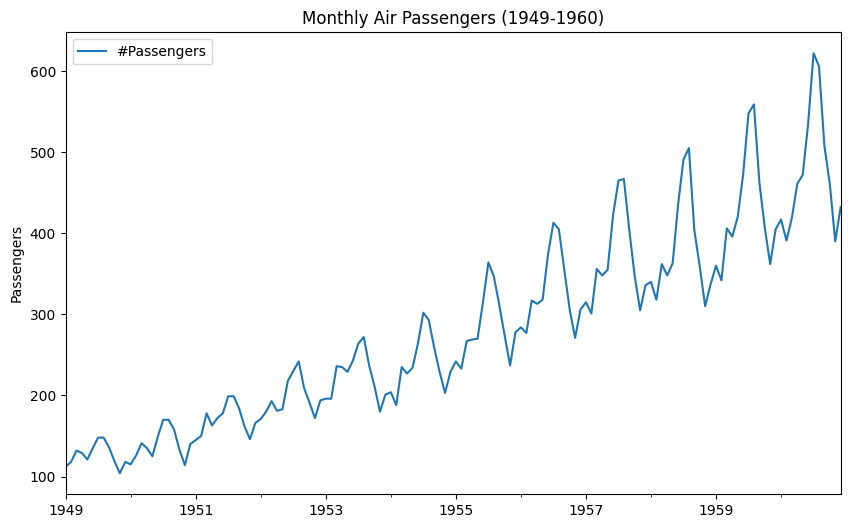

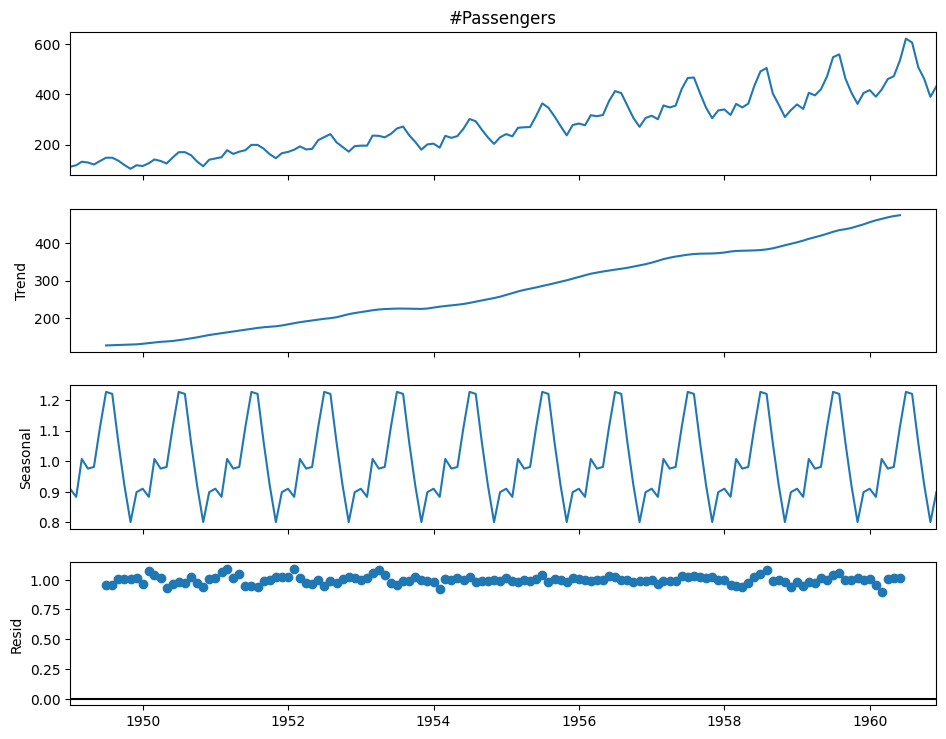

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.seasonal import seasonal_decompose
import statsmodels.api as sm # Changed import to get access to sm.datasets

# 1. Load the dataset
# Corrected: Load the AirPassengers dataset using get_rdataset
data = sm.datasets.get_rdataset("AirPassengers", "datasets")
df = data.data

# The 'time' column from R datasets is often a float representing year + fraction of year.
# Convert 'time' column to datetime index for monthly data.
df['year'] = df['time'].apply(lambda x: int(x))
df['month'] = ((df['time'] - df['year']) * 12).round().astype(int) + 1
df['date'] = pd.to_datetime(df['year'].astype(str) + '-' + df['month'].astype(str) + '-01')
df = df.set_index('date')['value'].rename_axis(None).to_frame(name='#Passengers')

# 2. Plot the original series
df.plot(figsize=(10,6), title='Monthly Air Passengers (1949-1960)')
plt.ylabel('Passengers')
plt.show()

# 3. Decompose the time series (multiplicative model)
# Model is multiplicative because seasonality increases with trend
decomposition = seasonal_decompose(df['#Passengers'], model='multiplicative', period=12)

# 4. Plot the decomposition
fig = decomposition.plot()
fig.set_size_inches(10, 8)
plt.show()

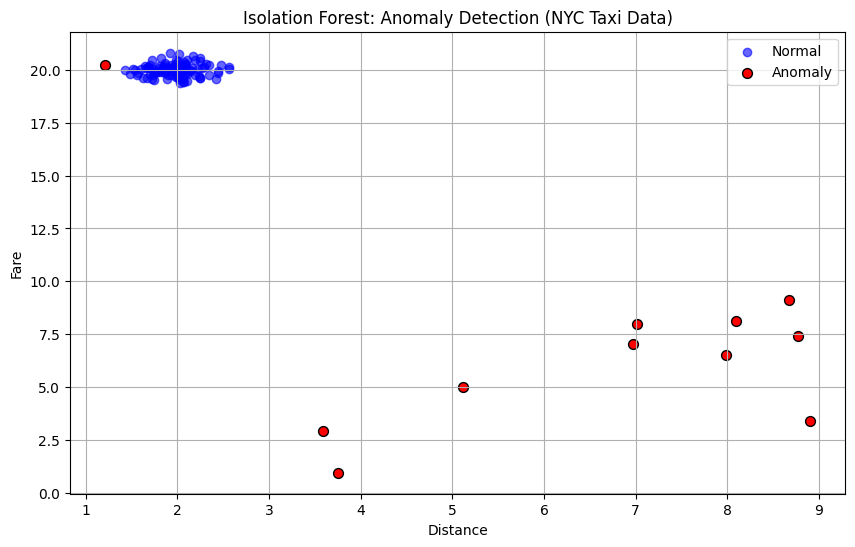

In [5]:
# Question7:APPly Isolation Forest on a numerical dataset(e.g., NYC Taxi Fare) to detect anomalies.Visualize the anomalies on a 2D scatter plot?
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.ensemble import IsolationForest

# 1. Generate/Load a numerical dataset (simulating NYC Taxi Fare: Distance vs Fare)
np.random.seed(42)
# Normal data points
X_normal = 0.3 * np.random.randn(100, 2) + np.array([2, 20])
# Abnormal data points (outliers)
X_outliers = np.random.uniform(low=0, high=10, size=(10, 2))
# Combine into a single dataset
X = np.r_[X_normal, X_outliers]
df = pd.DataFrame(X, columns=['Distance', 'Fare'])

# 2. Define and Fit the Isolation Forest Model
# contamination is the expected proportion of outliers (e.g., 10%)
model = IsolationForest(contamination=0.1, random_state=42)
model.fit(df)

# 3. Predict Anomalies (-1 for anomalies, 1 for normal)
df['anomaly'] = model.predict(df)

# 4. Visualize the Results
plt.figure(figsize=(10, 6))

# Scatter plot: Normal points
normal_points = df[df['anomaly'] == 1]
plt.scatter(normal_points['Distance'], normal_points['Fare'], c='blue', label='Normal', alpha=0.6)

# Scatter plot: Anomalous points
outlier_points = df[df['anomaly'] == -1]
plt.scatter(outlier_points['Distance'], outlier_points['Fare'], c='red', label='Anomaly', edgecolor='black', s=50)

plt.title('Isolation Forest: Anomaly Detection (NYC Taxi Data)')
plt.xlabel('Distance')
plt.ylabel('Fare')
plt.legend()
plt.grid(True)
plt.show()

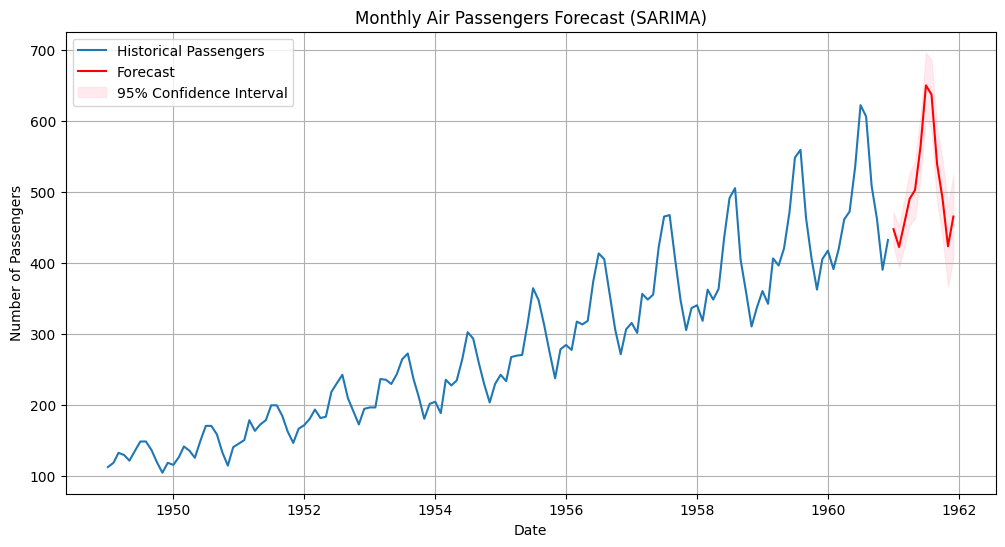

In [6]:
#Question8:Train a SARIMA model on the monthly airline passengers dataset . Forecast the next 12 months and visualize the results?
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.statespace.sarimax import SARIMAX
from statsmodels.tools.sm_exceptions import ConvergenceWarning
import warnings

# 1. Load Data
# You can use the built-in dataset in seaborn or download AirPassengers.csv
data = pd.read_csv('https://raw.githubusercontent.com/jbrownlee/Datasets/master/airline-passengers.csv')
data['Month'] = pd.to_datetime(data['Month'])
data.set_index('Month', inplace=True)
data.index.freq = 'MS' # Set frequency to Monthly Start

# 2. Train/Test Split (Optional, but good for validation)
# Here we train on all data to forecast the future
train = data

# 3. Define and Train SARIMA Model
# Order (p,d,q) and Seasonal Order (P,D,Q,s)
# Optimized parameters for Airline dataset are often (0,1,1)x(0,1,1,12)
model = SARIMAX(train['Passengers'], order=(0, 1, 1), seasonal_order=(0, 1, 1, 12), enforce_stationarity=False, enforce_invertibility=False)
results = model.fit()

# 4. Forecast next 12 months
forecast_steps = 12
forecast = results.get_forecast(steps=forecast_steps)
forecast_mean = forecast.predicted_mean
conf_int = forecast.conf_int() # Confidence intervals

# 5. Visualize Results
plt.figure(figsize=(12, 6))
plt.plot(train.index, train['Passengers'], label='Historical Passengers')
plt.plot(forecast_mean.index, forecast_mean, label='Forecast', color='red')
plt.fill_between(conf_int.index, conf_int.iloc[:, 0], conf_int.iloc[:, 1], color='pink', alpha=0.3, label='95% Confidence Interval')

plt.title('Monthly Air Passengers Forecast (SARIMA)')
plt.xlabel('Date')
plt.ylabel('Number of Passengers')
plt.legend()
plt.grid(True)
plt.show()


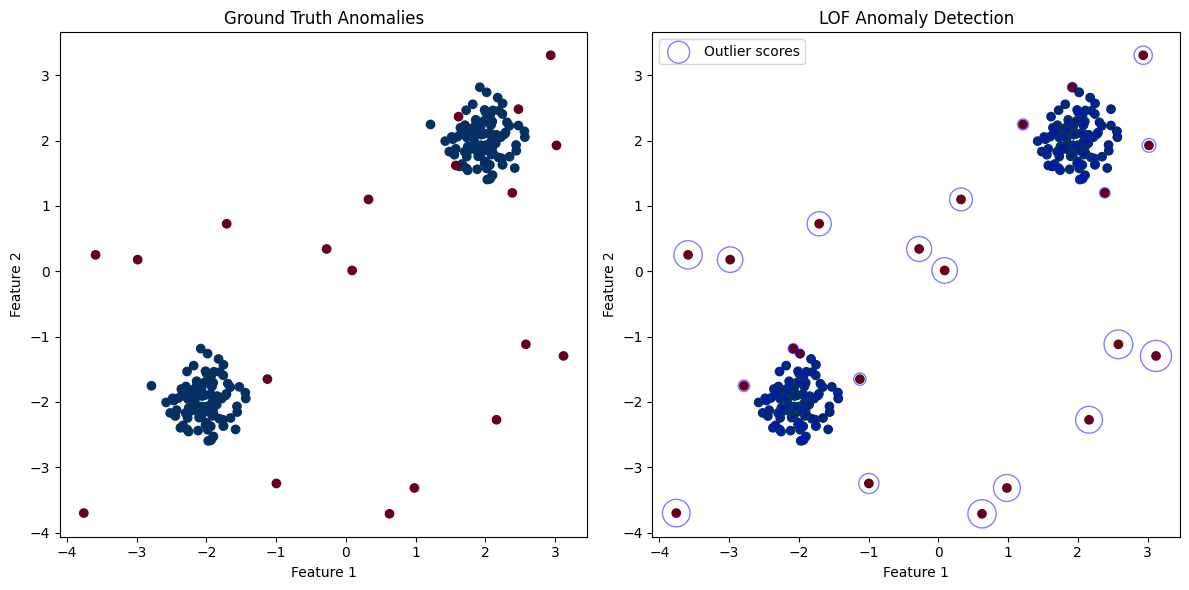

Number of prediction errors: 8


In [7]:
#Question9:Apply local Outlier Factor(LOF) on any numerical dataset to detect anomalies and visualize them using matplotllib?
import numpy as np
import matplotlib.pyplot as plt
from sklearn.neighbors import LocalOutlierFactor

# 1. Generate a synthetic dataset with outliers
np.random.seed(42)

# Generate inliers (normal data points)
X_inliers = 0.3 * np.random.randn(100, 2)
X_inliers = np.r_[X_inliers + 2, X_inliers - 2] # Create two clusters

# Generate outliers (anomalies)
X_outliers = np.random.uniform(low=-4, high=4, size=(20, 2))

# Combine inliers and outliers into a single dataset
X = np.r_[X_inliers, X_outliers]

# Define ground truth for evaluation (1 for inliers, -1 for outliers)
n_outliers = len(X_outliers)
ground_truth = np.ones(len(X), dtype=int)
ground_truth[-n_outliers:] = -1

# 2. Apply the Local Outlier Factor (LOF) model
# 'contamination' is the expected proportion of outliers in the data
lof = LocalOutlierFactor(n_neighbors=20, contamination=0.1) #

# Use fit_predict to compute the predicted labels of the training samples (-1 for outliers, 1 for inliers)
# When used for outlier detection on the training data, fit_predict() is used
y_pred = lof.fit_predict(X)

# Get the negative outlier factors (LOF scores)
# Lower values indicate a higher degree of outlierness
X_scores = lof.negative_outlier_factor_

# 3. Visualize the results
plt.figure(figsize=(12, 6))

# Subplot 1: Ground Truth
plt.subplot(1, 2, 1)
plt.title('Ground Truth Anomalies')
# Color points based on actual labels: blue for inliers (1), red for outliers (-1)
plt.scatter(X[:, 0], X[:, 1], c=ground_truth, cmap='RdBu')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')

# Subplot 2: LOF Predictions
plt.subplot(1, 2, 2)
plt.title('LOF Anomaly Detection')
# Color points based on predicted labels
plt.scatter(X[:, 0], X[:, 1], c=y_pred, cmap='RdBu')
# Optional: Plot circles around outliers proportional to their LOF score (smaller score, larger circle)
radius = (X_scores.max() - X_scores) / (X_scores.max() - X_scores.min())
plt.scatter(X[:, 0], X[:, 1], s=radius * 500, edgecolors='b', facecolors='none', alpha=0.5, label='Outlier scores')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.legend()

plt.tight_layout()
plt.show()

# Print the number of errors (optional for evaluation)
n_errors = (y_pred != ground_truth).sum()
print(f"Number of prediction errors: {n_errors}")


In [ ]:
#Question10:You are working as a data scientist for a power grid monitoring company.your goal is to forecast energy demand and also detect abnormal spikes or drops in real-time consumption data collected every 15 minutes. The dataset Includes features like timestamp, region,weather condition and energy usage.
#Explain your real-time data science workflow:
# How would you detect anomalies in this streaming data(Isolation Forest/LoF/DBSCAN)?
# Which time series model would you use for short-term forecasting(ARIMA/SARIMA/SARIMAX)?
# HOW would you vaildate and Monitor the performance over time?
# How would this solution help business decision or operations?
import pandas as pd
import numpy as np
from sklearn.ensemble import IsolationForest
!pip install pmdarima
from pmdarima import auto_arima
import matplotlib.pyplot as plt

# 1. Simulate 15-min data
data = pd.DataFrame({
    'timestamp': pd.date_range(start='2023-01-01', periods=1000, freq='15T'),
    'energy_usage': np.random.normal(100, 10, 1000) + np.sin(np.linspace(0, 100, 1000)) * 20,
    'temperature': np.random.normal(20, 5, 1000)
})
# Inject some anomalies
data.iloc[500, 1] = 200 # Spike
data.iloc[800, 1] = 20  # Drop
data.set_index('timestamp', inplace=True)

# 2. Anomaly Detection (Isolation Forest)
iso_forest = IsolationForest(contamination=0.01, random_state=42)
data['anomaly'] = iso_forest.fit_predict(data[['energy_usage']])

# Mark anomalies as -1, normal as 1
anomalies = data[data['anomaly'] == -1]

# 3. Short-term Forecasting (SARIMAX)
# Use historical data to train
train = data.iloc[:-100]
test = data.iloc[-100:]

# Assuming 'temperature' is an external feature
sarimax_model = auto_arima(train['energy_usage'], exogenous=train[['temperature']], seasonal=True, m=96 # 24 hours * 4
                           ,suppress_warnings=True, stepwise=True)

# Forecast
forecast = sarimax_model.predict(n_periods=100, exogenous=test[['temperature']])

# Plotting results
plt.figure(figsize=(12,6))
plt.plot(train.index[-200:], train['energy_usage'][-200:], label='Train')
plt.plot(test.index, test['energy_usage'], label='Actual', color='blue')
plt.plot(test.index, forecast, label='Forecast', color='red', linestyle='--')
plt.scatter(anomalies.index, anomalies['energy_usage'], color='red', label='Anomaly')
plt.legend()
plt.title("15-Min Energy Demand Forecast & Anomaly Detection")
plt.show()

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 689.1/689.1 kB 10.3 MB/s eta 0:00:00


/tmp/ipython-input-2051/780039374.py:16: FutureWarning: 'T' is deprecated and will be removed in a future version, please use 'min' instead.
  'timestamp': pd.date_range(start='2023-01-01', periods=1000, freq='15T'),
